## Task 4.9 Part 2:

### Step 1: Importing libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\steve\Documents\CF - Instacart Project'

In [4]:
opm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'nearfinal.pkl'))

In [4]:
opm.head(2)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,average_price,spending_flag,median_days,frequency_flag,gender,state,age,num_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423


### Step 3: Create a histogram of the 'order_hour_of_day' column:

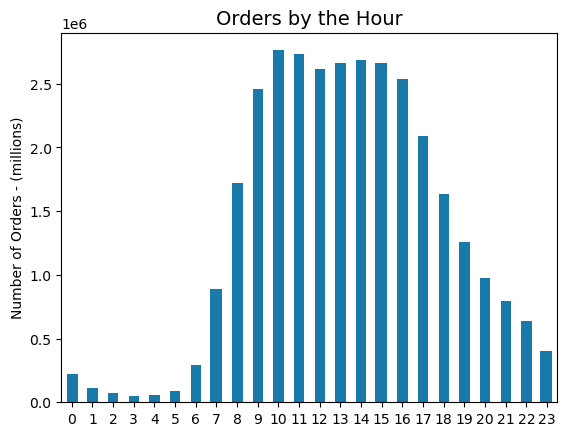

In [9]:
# Creating histogram, using order_hour_of_day
opm['order_hour_of_day'].plot.hist(bins=72)
bar_ordhour = opm['order_hour_of_day'].value_counts().sort_index().plot.bar(color='#1979a9')
plt.xlabel("", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Orders - (millions)", fontsize=10)  
plt.title("Orders by the Hour", fontsize=14)
plt.show()

In [10]:
bar_ordhour.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_ordhour.png'))

#### Insight:

For this histogram, the bins were separated into 48 bars, one to represent every half hour of the day.  From this, we can tell a few key things:

-Orders only really start coming in around 9am, before then there are some from time to time - especially around 8:00am, but not enough to really be considered "busy".

-Around 11:30am - 12:00pm there are no orders.  This is most likely due to lunch being taken by customers or the instacart shoppers.  Once that period is over, orders are still coming in, in high quantities.

-Orders start dropping off around 4:30pm and 5:00pm.  Additionally, orders continue to come in until 10:00pm at a higher rate than periods of 12:00a - 7:30am.

### Step 4: Create a Bar Chart for distribution of customers via loyalty

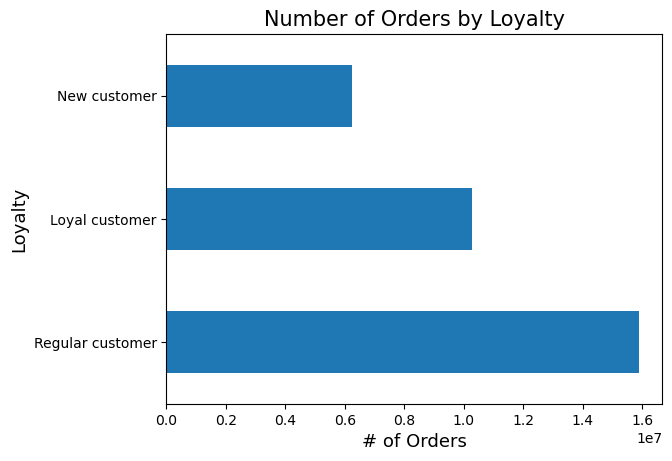

In [6]:
# Learned some tricks from the sample to make a nicer looking graph, trying it out
bars = opm['loyalty_flag'].value_counts()
bars = bars.plot(kind='barh')
plt.xlabel("# of Orders", fontsize=13)
plt.ylabel("Loyalty", fontsize=13)  
plt.title("Number of Orders by Loyalty", fontsize=15)
plt.show()
# The way I learned it from the lesson was like so:
# opm['loyalty_flag'].value_counts().plot.bar()
# I liked this option cause it looks clearner and has more customizations

### Step 5: Check if there is difference in expenditure depending on hour of the day

In [21]:
# Getting random results for a small sample population
np.random.seed(26)
pool = np.random.rand(len(opm)) <= 0.7

In [22]:
# Creating a big and small sample pool, false is 30% of rows, true is 70%
big = opm[pool]
small = opm[~pool]

In [23]:
# Quick math to check and match rows and % of pop
len(opm)

32404859

In [24]:
len(big)

22684191

In [25]:
len(small)

9720668

In [26]:
len(big)+len(small)

32404859

In [27]:
len(small)/len(opm)

0.29997563019792806

In [28]:
# Removing unnecessary columns to speed up processing
pricetime = small[['prices', 'order_hour_of_day']]

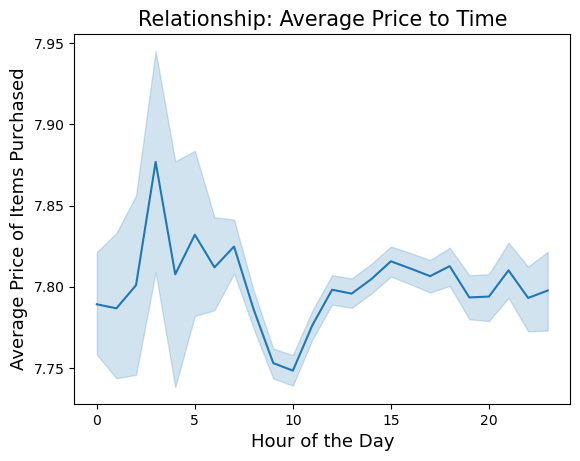

In [29]:
line = sns.lineplot(data = pricetime, x = 'order_hour_of_day', y = 'prices')
plt.xlabel("Hour of the Day", fontsize=13)
plt.ylabel("Average Price of Items Purchased", fontsize=13)  
plt.title("Relationship: Average Price to Time", fontsize=15)
plt.show()

#### Insight:

While there does look to be a spike in spending around 3:00am and a dip around 10:00am, the reality is that the difference between the two periods is around $0.12 per item, which is negligable.  Due to this, we can conclude that different hours in the day result in very similar averages in regard to spend per item.

### Step 6: Determine if there's a connection between age and familiar situation

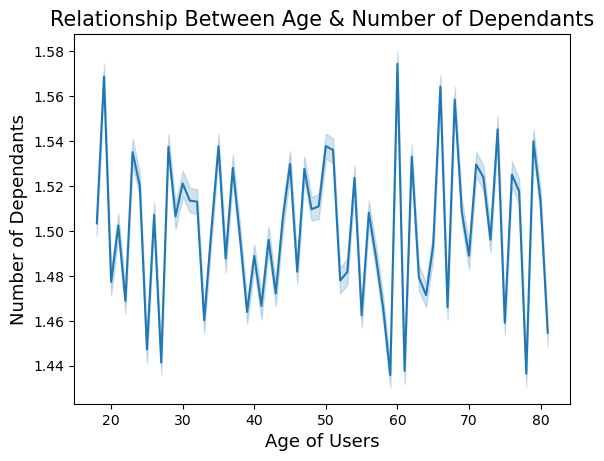

In [19]:
# Creating Scatterplot, using the small pool created in the previous step
line_chart = sns.lineplot(data = small, x='age', y='num_dependants')
plt.xlabel("Age of Users", fontsize=13)
plt.ylabel("Number of Dependants", fontsize=13)  
plt.title("Relationship Between Age & Number of Dependants", fontsize=15)
plt.show()

#### Insight:

There does not appear to be any correlation with the number of age and number of dependents.  The average rests between 1.4-1.6 number of dependents per age category, which is not a significant range.

### Step 7: See if there is a connection between age and spending

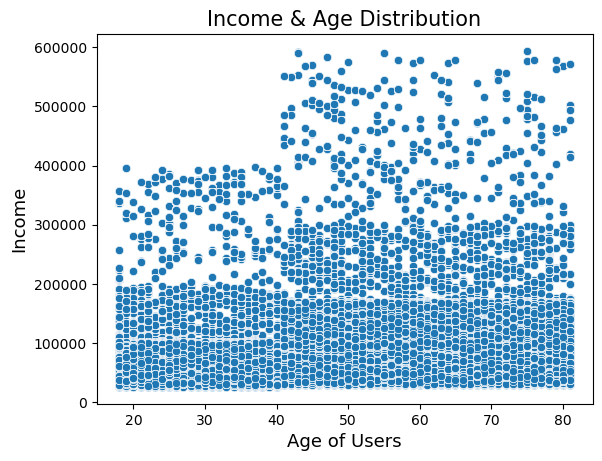

In [18]:
scatter_plot = sns.scatterplot(data = small, x='age', y='income')
plt.xlabel("Age of Users", fontsize=13)
plt.ylabel("Income", fontsize=13)  
plt.title("Income & Age Distribution", fontsize=15)
plt.show()

#### Insights:

It does appear that above the age of 40, there are a decent number of customers with higher-than-average income.  Most users are under $200k income, as those areas are more dense and are consistent through all the age groups.  

In [31]:
bars.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_time.png'))
line_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))
scatter_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_income_age.png'))